In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
def w_init():
  while True:
    w = np.random.uniform(0,1,(2,1))
    if (w[0] > 0 and w[1] > 0 and w[0] + w[1] < 1):
      return w

In [3]:
def gradient(x,y):
  a = 1/(1 - x - y) - 1/x
  b = 1/(1 - x - y) - 1/y
  return np.array([a,b])

In [4]:
def energy_func(x,y):
  a =  -np.log(1 - x - y) - np.log(x) - np.log(y)
  return a

In [34]:
def grad_descent(w):
  weights = []
  E = []
  while (w[0] > 0 and w[1] > 0 and w[0] + w[1] < 1):
      g = gradient(w[0],w[1])
      E.append(E_func(w[0],w[1]))
      update = learning_rate_GD * g
      w_n = np.subtract(w,update)
      weights.append(w)
      if np.linalg.norm(w - w_n) < threshold:
        return E,weights
      w =  w_n

In [11]:
def hessian(x,y):
  x = float(x)
  y = float(y)
  a = 1/((1-x-y)*(1-x-y)) + 1/(x*x)
  b = 1/((1-x-y)*(1-x-y))
  d = 1/((1-x-y)*(1-x-y)) + 1/(y*y)
  return np.array([[a,b],[b,d]])

In [33]:
def newtons_method(w):
  weights = []
  E = []
  while (w[0] > 0 and w[1] > 0 and w[0] + w[1] < 1):
      h = hessian(w[0],w[1])
      g = gradient(w[0],w[1])
      E.append(E_func(w[0],w[1]))
      update =  learning_rate_NM * np.matmul(inv(h), g) 
      w_n = np.subtract(w,update)
      weights.append(w)
      if np.linalg.norm(w - w_n) < threshold:
        return E,weights
      w =  w_n

In [38]:
def plot_func(w_n,name,e_n):
    w_x = []
    w_y = []
    for i in w_n:
        w_x.append(i[0])
        w_y.append(i[1])
    plt.figure(figsize=(10,10))
    plt.scatter(w_x,w_y,c = 'red')
    plt.ylim([0,1])
    plt.xlim([0,1])
    plt.ylabel('Y values')
    plt.xlabel('X values')
    plt.title(name + ' weights')
    plt.show()
    plt.figure(figsize=(10,10))
    plt.scatter(range(len(e_n)), e_n , c = 'blue')
    plt.ylabel('Energies')
    plt.xlabel('Iterations')
    plt.title('Energies Vs Iterations ' + name)
    plt.show()

    

*w0 is the initial weight*

In [27]:
w0 = w_init()
learning_rate_GD = 0.01
learning_rate_NM = 1
threshold = 0.000001

In [28]:
w0

array([[0.19004398],
       [0.5243985 ]])

*The initial weight for both Gradient descent and Newtons method is w0. I started with 1 for the learning rate as asked in the question but for Gradient descent the algorithm was not converging and hence I changed the learning rate to 0.01. For Newtons method learning rate = 1 worked perfectly. *

# Gradient Descent

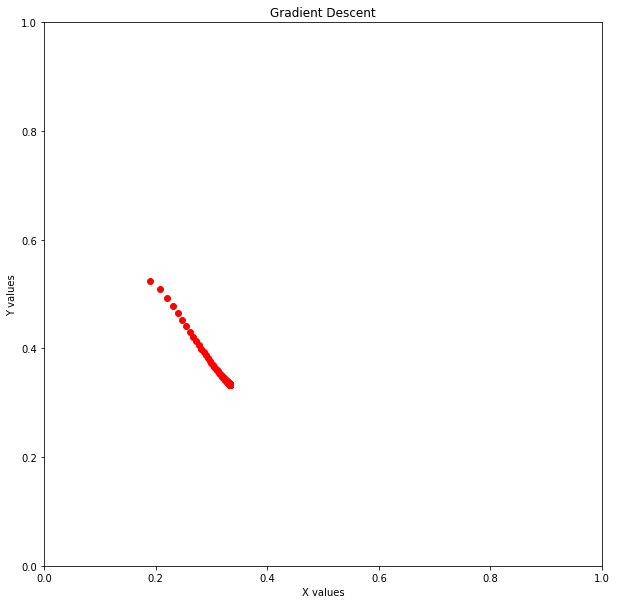

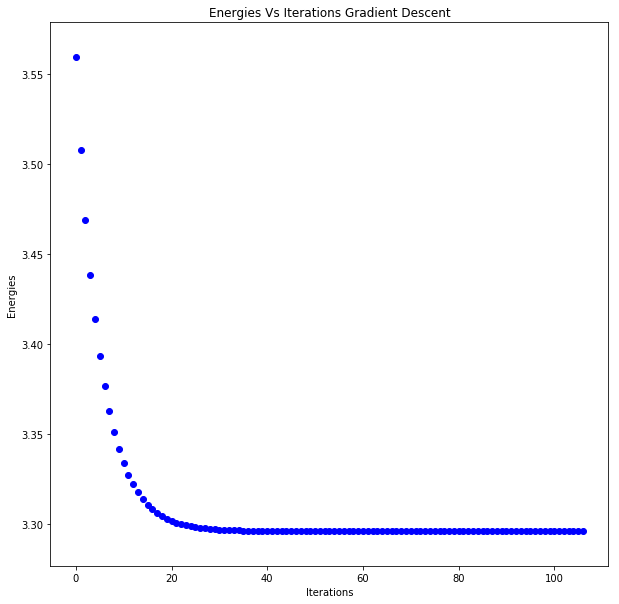

In [36]:
energy_GD, weights_GD = grad_descent(w0)
plot_func(weights_GD,'Gradient Descent',energy_GD)

# Newtons Method

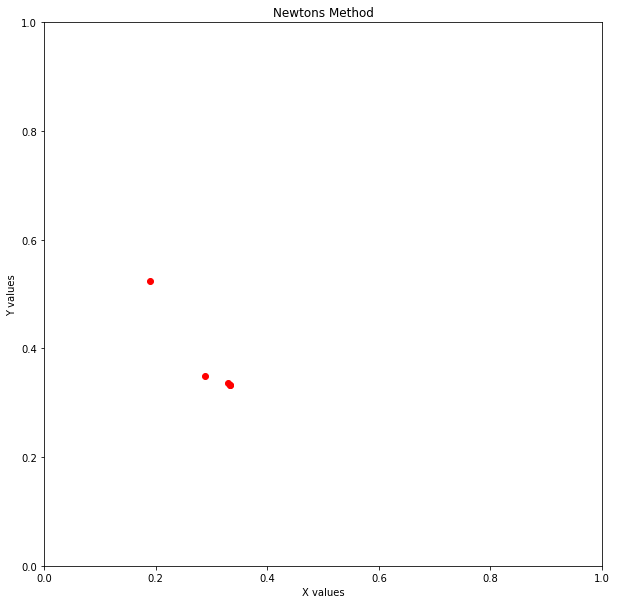

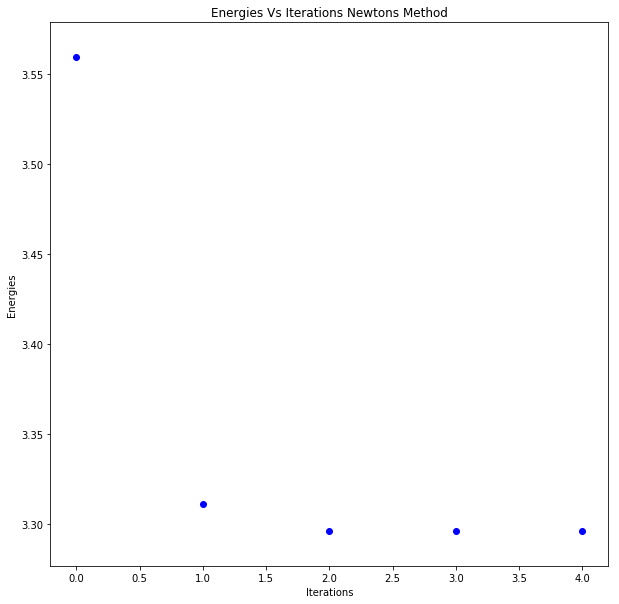

In [37]:
energy_NM, weights_NM = newtons_method(w0)
plot_func(weights_NM,'Newtons Method',energy_NM)

*Iterations taken by Gradient descent are around 120 for learning rate = 0.01(for learning rate = 1, GD is diverging) whereas Newtons method took around 4 iterations for learning rate = 1 (for learning rate = 0.01, it took around 800 iterations) approaching the estimated global minimum.
So we can say that Newtons method converges faster compared to the Gradient descent as GD takes small steps towards the local minimum by taking the first derivative approach.
Computationally speaking, GD takes many cheap steps whereas NM takes few costly steps(as NM has to calculate hessian and gradient both).*